First 5 rows of the dataset:

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


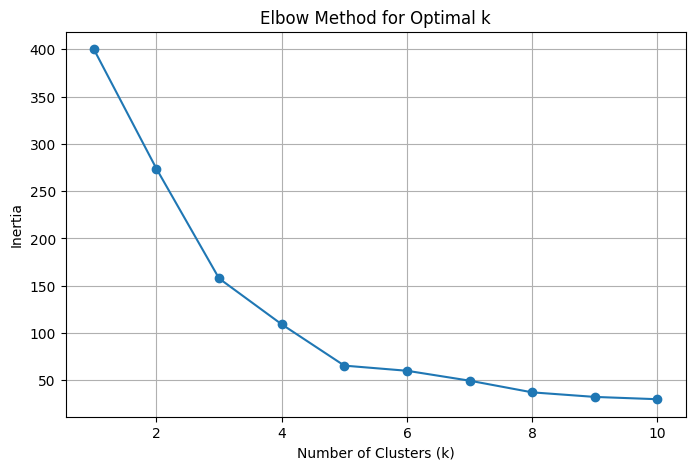

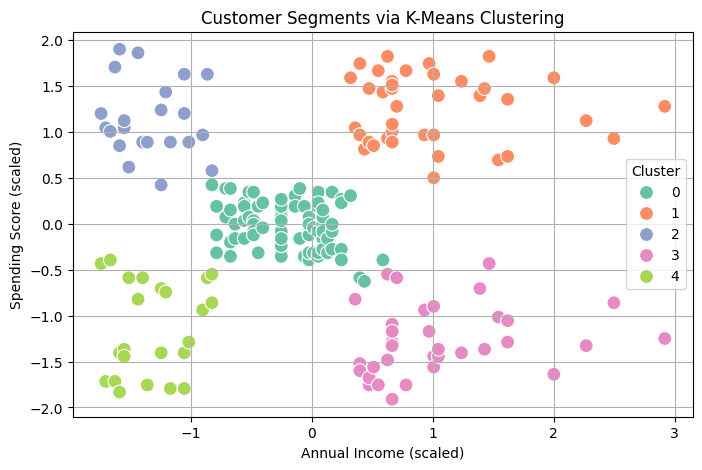

Silhouette Score for k=5: 0.555


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load dataset (file must be in the same folder)
df = pd.read_csv("Mall_Customers.csv")

# Step 2: Display first few rows
print("First 5 rows of the dataset:\n")
print(df.head())

# Step 3: Select features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Step 4: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 6: Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Step 7: Fit final model (choose k=5 based on elbow plot)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Step 8: Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Segments via K-Means Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.grid(True)
plt.show()

# Step 9: Evaluate using Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {sil_score:.3f}")
